## CNN : 이미지 인식!
손글씨를 컴퓨터가 어떻게 읽고 인지할 수 있을까?
* MNIST : 손글씨 데이터셋

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('학습셋 이미지 수 : %d개' % (X_train.shape[0]))
print('테스트셋 이미지 수 : %d개' % (X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


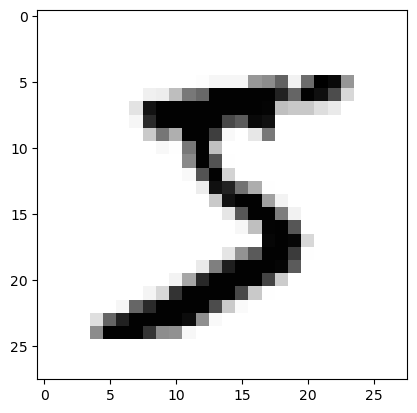

In [7]:
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

* 28*28 = 총 784개의 픽셀로 이루어져있다.
* 흰색 배경은 0, 글씨가 들어간 곳은 0~255의 숫자 중 하나로 채워져 긴 행렬로 이루어져있다

In [8]:
# 이미지가 인식되는 원리
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s"% i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

28*28 = 784개의 속성을 가지고 0~9의 클래스 중 하나를 맞히는 문제가 됨

* 28*28의 2차원 배열을 784개의 1차원 배열로 바꿔야한다.
* keras는 0에서 1사이의 갑으로 변환한 후 구동할 때 최적의 성능을 보인다
* 현재 0~255사이의 값으로 이루어진 값을 0~1로 바꾼다.
    - 이렇게 데이터의 폭이 클때 적절한 값으로 분산의 정도를 바꾸는 과정 :  정규화(normalisation)라고 한다,

In [9]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train/255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

print('class : %d' % (y_train[0]))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

class : 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 딥러닝 기본 프레임 만들기

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import os
'''
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys

# MNIST 데이터를 불러오고 테스트셋과 학습셋으로 나눈다
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 차원 변환 후, 카테고리 변수를 원핫인코딩
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
'''

In [12]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# 모델 실행환경 설정
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# 모델 최적화를 위한 설정구간
MODEL_DIR = '../data/model1/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = '../data/model1/MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
earlystopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
# 모델 실행
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 200, verbose = 0, callbacks = [earlystopping_callback, checkpointer])

# 테스트 정확도를 출력
print('\n Test Accuracy : %.4f' % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18933, saving model to ../data/model1\MNIST_MLP.hdf5


c:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18933 to 0.13567, saving model to ../data/model1\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13567 to 0.11358, saving model to ../data/model1\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11358 to 0.10201, saving model to ../data/model1\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10201 to 0.09122, saving model to ../data/model1\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09122 to 0.08592, saving model to ../data/model1\MNIST_MLP.hdf5

Epoch 7: val_loss did not improve from 0.08592

Epoch 8: val_loss improved from 0.08592 to 0.08216, saving model to ../data/model1\MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08216

Epoch 10: val_loss did not improve from 0.08216

Epoch 11: val_loss improved from 0.08216 to 0.07769, saving model to ../data/model1\MNIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.07769

Epoch 13: val_loss did not improve from 0.07769

Epoch 14: val_loss did not improve from 0.07769

Epoch 15: val

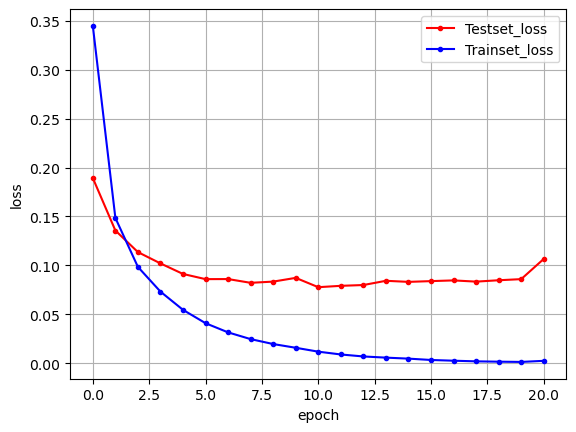

In [16]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 컨볼루션 신경망 (CNN)
: 입력된 이미지에서 다시 한 번 특징을 추출하기 위해 커널(슬라이딩 윈도)을 도입하는 기법
- 입력된 이미지에 가중치가 들어 있는 커널을 적용.
- 적용된 부분은 원래 있던 값에서 가중치의 값을 곱한다. --> 그 결과를 합하면 새로 추출된 값

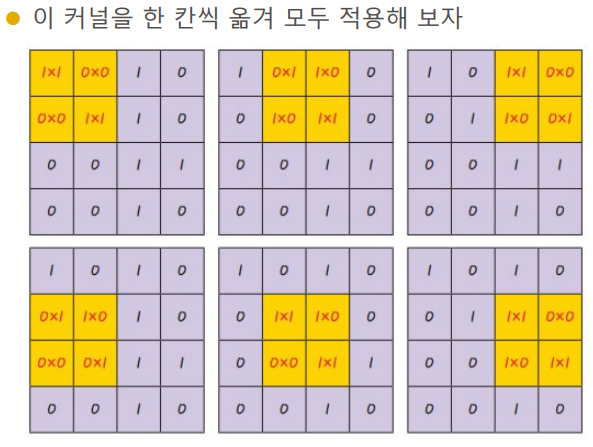 <br>
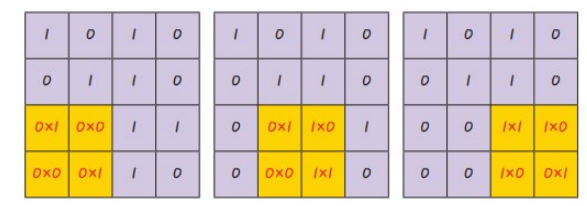

- 결과

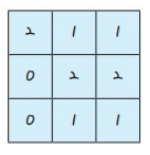

- 이렇게 새롭게 만들어진 층을 컨볼루션(합성곱)층이라고 한다.
- 컨볼루션 층을 만들면 입력 데이터가 가진 특징을 대략적으로 추출해서 학습을 진행
- 커널을 여러개 만들 경우 여러개의 컨볼루션 층이 만들어진다.

#### 케라스에서 컨볼루션 층을 추가하는 함수는 Conv2D( )
```
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28, 28, 1), activation = 'relu))
```
입력하는 4가지 인자
* 첫번째 인자 : 적용할 커널의 수
* kernel_size : (행, 열)형식으로 커널의 크기 지정
* input_shape : (행, 열, 색상(3) 또는 흑백(1))형식. Dense층과 마찬가지로 맨 처음 층에 입력되는 값
* activation :활성화 함수 지정

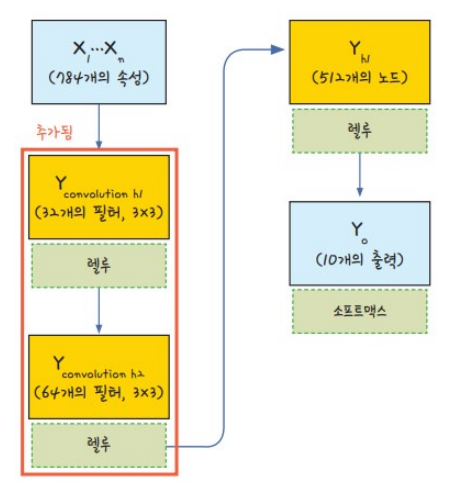

#### 맥스 풀링, 드롭 아웃, 플랫튼
: 앞서 구현한 컨볼루션 층으 통해 이미지를 도출한 결과가 여전히 크고 복잡하면 이를 다시 한번 축소해야한다.
- 이 과정을 풀링(Pooling) 또는 서브 샘플링(sub sampling)이라고 한다.
* 풀링 기법
    - 맥스 풀링(max pooling) : 정해진 구역 안에서 최댓값을 뽑아낸다.
    - 평균 풀링(average pooling) : 정해진 구역 안에서 평균값을 뽑아낸다.
    - 예) ```model.add(MaxPooling2D(pool_size = (2,2)))``` : pool_size를 이용해 풀링 창 크기를 지정

    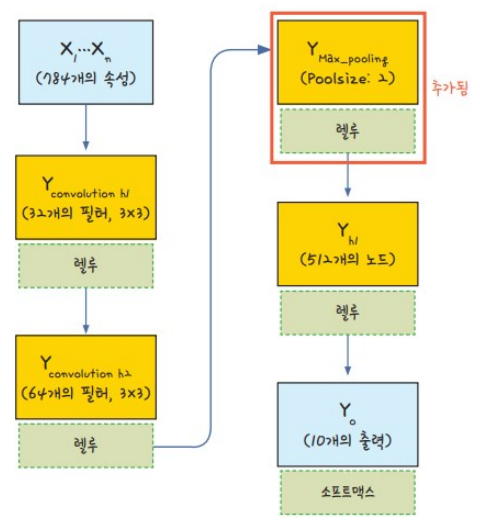

* 드롭아웃
: 노드가 많아지거나 층이 많아지면 과적합이 일어날 수 있다. 
    - 드롭아웃(Dropout)은 은닉층에 배치된 노드 중 일부를 임의로 꺼준다.

    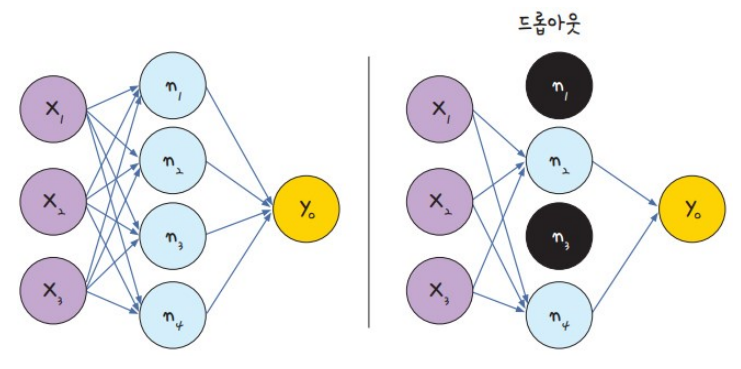

    - 랜덤하게 노드를 꺼주면 과적합을 방지할 수 있다. keras에서는 이런 드롭아웃을 %를 지정해서 노드를 끌 수 있다.
* 플랫튼
    - 컨볼루션 층이나 맥스풀링은 주어진 이미지는 2차원 배열이내로 다룬다
    - 이를 1차원으로 바꾸어주어야 활성화 함수가 있는 층에서 사용할 수 있다.
    - Flatten()함수는 이때 2차원 배열을 1차원으로 바꾸어 준다

    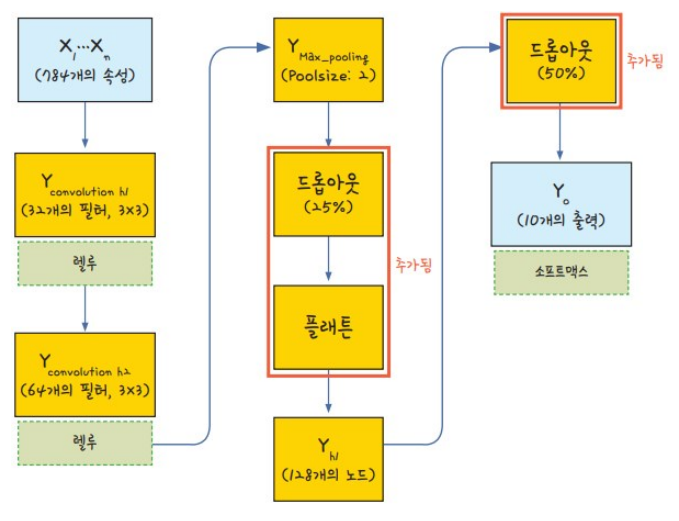

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys

# MNIST 데이터를 불러오고 테스트셋과 학습셋으로 나눈다
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 차원 변환 후, 카테고리 변수를 원핫인코딩
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float64')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float64')/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [8]:
# 모델의 실행 옵션
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 최적화 설정구간
MODEL_DIR = '../data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = '../data/model/MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
earlystopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

# 모델 실행
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 200, verbose = 0, callbacks = [earlystopping_callback, checkpointer])

# 테스트 정확도
print('\n Test Accuracy : %.4f' % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08410, saving model to ../data/model\MNIST_CNN.hdf5


c:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.08410 to 0.06409, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06409 to 0.05186, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05186 to 0.04453, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04453

Epoch 6: val_loss improved from 0.04453 to 0.04220, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04220 to 0.04111, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.04111 to 0.04066, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.04066

Epoch 10: val_loss did not improve from 0.04066

Epoch 11: val_loss improved from 0.04066 to 0.03917, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 12: val_loss did not improve from 0.03917

Epoch 13: val_loss did not improve from 0.03917

Epoch 14: val_loss did not improve from 0.03917

Epoch 15: val_loss d

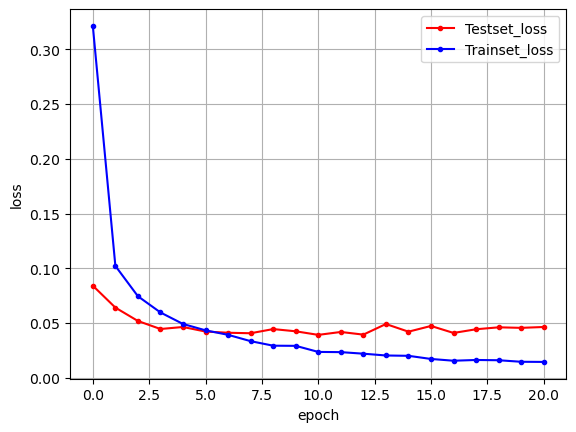

In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

313/313 [==============================] - 5s 15ms/step


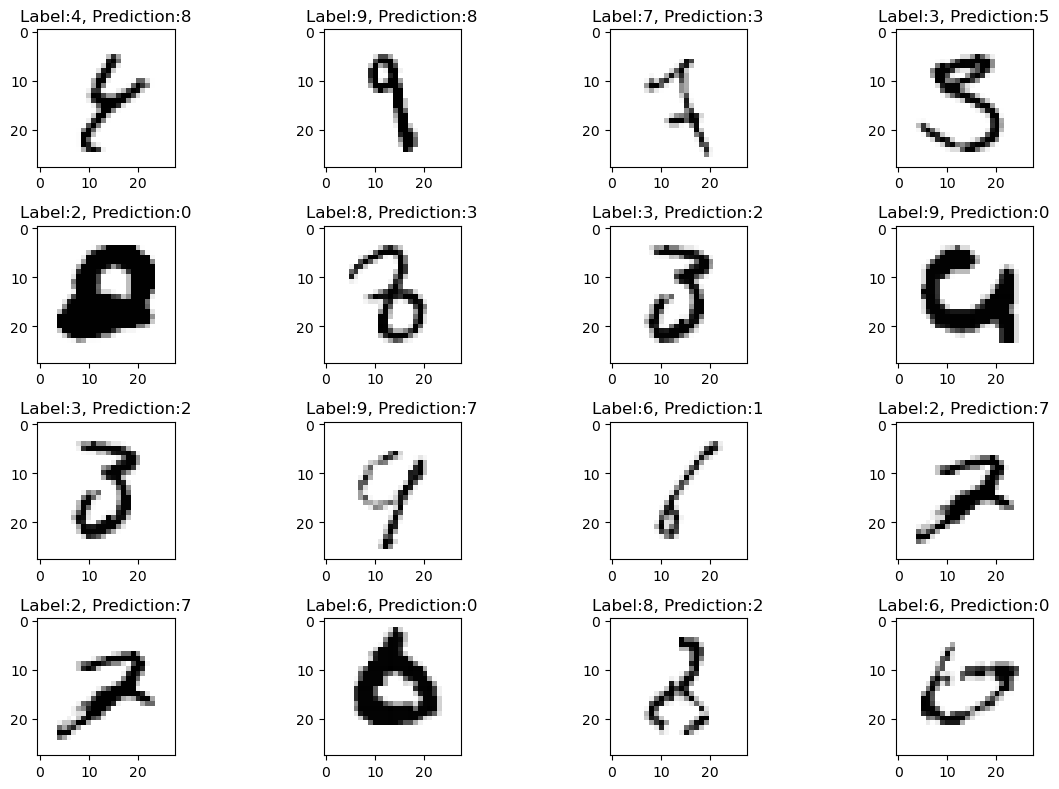

In [10]:
import random
import numpy as np
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)
wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:  # 예상과 실제가 다를 때
        wrong_result.append(n)
samples = random.choices(population=wrong_result, k=16)
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)
plt.tight_layout()
plt.show()

* 참고 사이트 : https://cs231n.github.io/convolutional-networks/